In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import StringIO

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_excel(r"D:\AI Fellowship Fusemachine\FM_smart-farming-solution\data\bronson_2018\F113_2018_MegaTable.xlsx", sheet_name='MegaTable')

In [6]:
df.shape

(62, 963)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 963 entries, GPSpoint to MTCI_R_176
dtypes: float64(958), object(5)
memory usage: 466.6+ KB


In [60]:
df.isna().sum()

Rep              10
Plot             10
Subplot          10
GPS_KB_13        10
GPS_KB_14        10
                 ..
Ht_bed_cm_111    10
Plt_ht_cm_111    10
Avg_30o          10
Avg_nadir        10
Avg_nadir_air    10
Length: 578, dtype: int64

In [39]:
a = ['Hello', 'Hero', 'Zero', 'Nice']
ref = [i for i in a if i.startswith('er')]
ref

[]

In [10]:
def get_columns_that_startswith(col_starts_list):
    required_cols = []
    for str in col_starts_list:
        required_cols += [i for i in df.columns if i.startswith(str)]
    return required_cols

## Saving nitrogen data

In [23]:
required_cols = get_columns_that_startswith(['GPS', 'Plot_no', 'N_Tr','Rep' ,'Treat_n','Irr_treat', 'Treat_no','N_Rate'])

In [24]:
len(required_cols)

11

In [40]:
required_cols

['GPSpoint',
 'Plot_no',
 'N_Treat',
 'Rep',
 'Treat_no',
 'Irr_treat',
 'Treat_no',
 'N_Rateha_2017',
 'N_Rateac_2017',
 'N_Rateha',
 'N_Rateac']

In [42]:
df_N = df[required_cols]
df_N.isnull().sum()

GPSpoint         2
Plot_no          2
N_Treat          2
Rep              2
Treat_no         2
Irr_treat        2
Treat_no         2
N_Rateha_2017    2
N_Rateac_2017    2
N_Rateha         2
N_Rateac         2
dtype: int64

<Axes: >

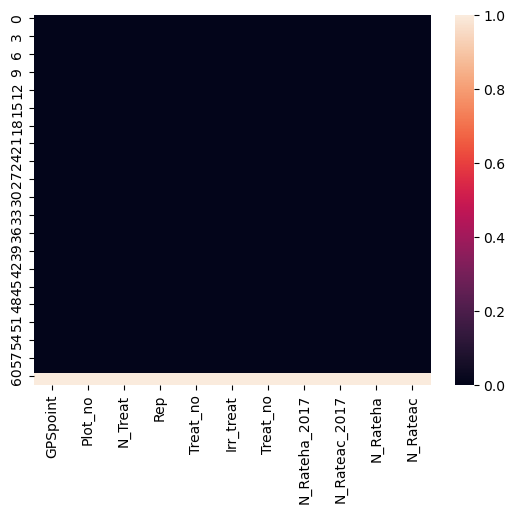

In [43]:
sns.heatmap(df_N.isna())

In [48]:
df_N.shape

(62, 11)

In [53]:
df_N.dropna(inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\2189957070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N.dropna(inplace=True)


In [54]:
df_N.shape

(60, 11)

<Axes: >

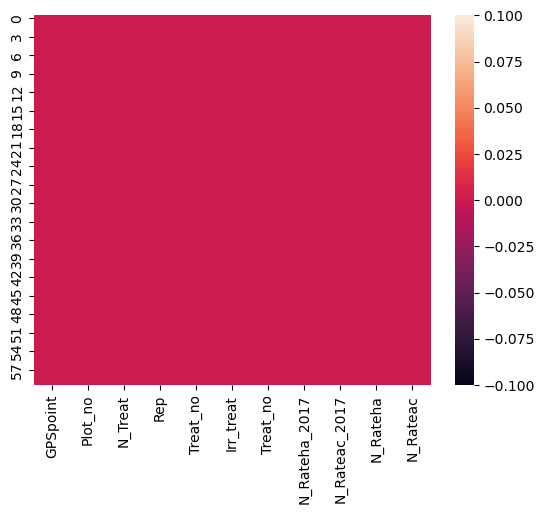

In [55]:
sns.heatmap(df_N.isna())

In [57]:
df_N.to_csv("./refined_data/nitrogen_rate.csv")

## Saving the soil data

In [68]:
required_cols = get_columns_that_startswith(['GPS', 'Plot_no',"Rep", 'Silt', 'Sand', 'Clay','Potassium','Sulfate','Zinc','Iron','Manganese', 'Sodium','Boron', 'NO3','NH4_','Nov_NO3'])

In [69]:
required_cols

['GPSpoint',
 'Plot_no',
 'Rep',
 'Silt_A',
 'Silt_B',
 'Silt_C',
 'Silt_D',
 'Sand_A',
 'Sand_B',
 'Sand_C',
 'Sand_D',
 'Clay_A',
 'Clay_B',
 'Clay_C',
 'Clay_D',
 'Potassium ppm K',
 'Sulfate-S ppm S',
 'Zinc ppm Zn',
 'Iron ppm Fe',
 'Manganese ppm Mn',
 'Sodium ppm Na',
 'Boron ppm B',
 'NO3ppm_0_12',
 'NO3ppm_12_24',
 'NO3ppm_24_36',
 'NO3ppm_36_48',
 'NO3ppm_48_60',
 'NO3ppm_60_72',
 'NO3ppm_72_84',
 'NO3_A_Wards',
 'NO3_B_Wards',
 'NO3_C_Wards',
 'NO3_D_Wards',
 'NO3_0_24',
 'NO3_0_36',
 'NO3_0_48',
 'NO3_0_60',
 'NO3_0_72',
 'NO3_36_48',
 'NO3_48_60',
 'NO3_60_72',
 'NO3_36_72',
 'NO3_60_72.1',
 'NO3_36_72.1',
 'NH4_0_24',
 'NH4_0_36',
 'NH4_0_48',
 'NH4_36_48',
 'NH4_48_60',
 'NH4_60_72',
 'NH4_36_72',
 'Nov_NO3ppm_0_12',
 'Nov_NO3ppm_12_24',
 'Nov_NO3ppm_24_36',
 'Nov_NO3ppm_36_48',
 'Nov_NO3ppm_48_60',
 'Nov_NO3ppm_60_72',
 'Nov_NO3ppm_72_84',
 'Nov_NO3_0_24',
 'Nov_NO3_0_36',
 'Nov_NO3_0_48',
 'Nov_NO3_0_60',
 'Nov_NO3_0_72',
 'Nov_NO3_36_48',
 'Nov_NO3_48_60',
 'Nov_NO3_6

In [70]:
len(required_cols)

80

In [71]:
df_soil_comp = df[required_cols]

In [73]:
df_soil_comp.shape

(62, 80)

In [75]:
df_soil_comp.isna().sum()

GPSpoint                 2
Plot_no                  2
Rep                      2
Silt_A                   2
Silt_B                   2
                        ..
Nov_NO3_Per_rec_12_24    2
Nov_NO3_Per_rec_24_36    2
Nov_NO3_Per_rec_36_48    2
Nov_NO3_Per_rec_48_60    2
Nov_NO3_Per_rec_60_72    2
Length: 80, dtype: int64

In [76]:
df_soil_comp.dropna(inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\2630906913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soil_comp.dropna(inplace=True)


In [78]:
df_soil_comp.replace(-9999, np.nan, inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\427974167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soil_comp.replace(-9999, np.nan, inplace=True)


In [80]:
df_soil_comp.isna().sum()

GPSpoint                  0
Plot_no                   0
Rep                       0
Silt_A                    0
Silt_B                    0
                         ..
Nov_NO3_Per_rec_12_24    57
Nov_NO3_Per_rec_24_36    57
Nov_NO3_Per_rec_36_48    57
Nov_NO3_Per_rec_48_60    57
Nov_NO3_Per_rec_60_72    57
Length: 80, dtype: int64

In [82]:
df_soil_comp.dropna(axis=1, thresh=30, inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\2748259084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soil_comp.dropna(axis=1, thresh=30, inplace=True)


In [84]:
df_soil_comp.shape

(60, 60)

In [85]:
df_soil_comp.to_csv('./refined_data/soil_data_comp.csv')

## Saving Plant Phenotype data

In [87]:
required_cols = get_columns_that_startswith(['GPS', 'Plot_no','Rep', 'Plant','Petiole', 'Leaf','Stem'])

In [88]:
df_plant = df[required_cols]

In [89]:
df_plant.shape

(62, 44)

In [96]:
df_plant.replace(-9999, np.nan, inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\4212312164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plant.replace(-9999, np.nan, inplace=True)


In [98]:
df_plant.isna().sum()

GPSpoint             0
Plot_no              0
Rep                  0
Plant_ht_134        30
Plant_wh_134        30
Plant_ht_141        30
Plant_wh_141        30
Plant_ht_149        30
Plant_wh_149        30
Plant_ht_156        30
Plant_wh_156        30
Plant_ht_162        30
Plant_wh_162        30
Plant_ht_169        30
Plant_wh_169        30
Plant_ht_176        30
Plant_wh_176        30
Plant_ht_184        30
Plant_wh_184        30
Plant_ht_190        30
Plant_wh_190        30
Petiole_120         31
Petiole_127         30
Petiole_136         30
Petiole_143         30
Petiole_150         30
Petiole_157         30
Petiole_164         30
Petiole_171         30
Petiole_178         30
Petiole_183         30
LeafN_127           30
LeafN_136           30
LeafN_143           30
LeafN_150           30
LeafN_157           30
LeafN_164           30
LeafN_171           30
LeafN_178           30
LeafN_183           30
Stem_ct_197          0
Stem_gross_g_197     0
Stem_bag_g           0
Stem_g_197 

In [92]:
df_plant.dropna(inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\1360944602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plant.dropna(inplace=True)


<Axes: >

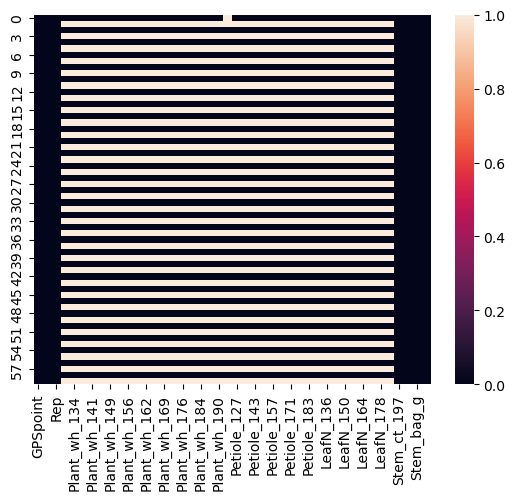

In [99]:
sns.heatmap(df_plant.isna())

In [100]:
df_plant.dropna(inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\1360944602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plant.dropna(inplace=True)


In [101]:
df_plant.to_csv('./refined_data/plant_phenotype.csv')

## Saving index data

In [102]:
required_cols = get_columns_that_startswith(['GPS', 'Plot_no','Rep','TargTemp','SBTemp', 'NDVIA','NDVI','NDR','NDV','PRI','CI_','CCCI', 'DATT','CIRE', 'MTCI'])

In [103]:
df_index = df[required_cols]

In [104]:
df_index.shape

(62, 471)

In [105]:
df_index.isna().sum()

GPSpoint          2
Plot_no           2
Rep               2
TargTemp_1_106    2
TargTemp_2_106    2
                 ..
MTCI_R_162        2
MTCI_L_169        2
MTCI_R_169        2
MTCI_L_176        2
MTCI_R_176        2
Length: 471, dtype: int64

In [106]:
df_index.dropna(inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\1516162632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index.dropna(inplace=True)


In [109]:
df_index.replace(-9999 , np.nan,inplace=True)

C:\Users\JARVIS\AppData\Local\Temp\ipykernel_22392\2183329678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index.replace(-9999 , np.nan,inplace=True)


In [111]:
df_index.isna().sum()

GPSpoint          0
Plot_no           0
Rep               0
TargTemp_1_106    0
TargTemp_2_106    0
                 ..
MTCI_R_162        0
MTCI_L_169        0
MTCI_R_169        0
MTCI_L_176        0
MTCI_R_176        0
Length: 471, dtype: int64

In [112]:
df_index.to_csv('./refined_data/index_data.csv')